<img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 10 :
    <br><br>Decision Trees & Random Forest &<br><br>K-Means & PCA</font></h1>
<h1 align=center><font size = 4>Filoger Summer School, 1401 | DeadLine: 19th Mordad, 23:00 </font></h1>



## Question Sheet!

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>

<b>Download the Question sheet from the following link!</b>
-   <a href="https://new.edmodo.com/groups/filoger-summer-school-38664125">Lab 10 :Decision Trees & Random Forest & K-Means & PCA</a>
</font>
</div>


# Step1: Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from pprint import pprint

# Step2: Import the Dataset

In [3]:
def answer_one(): 
    import numpy as np
    import pandas as pd
    from sklearn.datasets import load_iris 
    cancer = load_iris()     
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

df = answer_one()

# Step3: Data Overview

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [6]:
df.rename(columns = {'sepal length (cm)':'slength','sepal width (cm)':'swidth','petal length (cm)':'plength','petal width (cm)':'pwidth'} , inplace= True)
df.head()

,slength,swidth,plength,pwidth,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df['slength'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [8]:
df['swidth'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [9]:
df['plength'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [10]:
df['pwidth'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [11]:
df['target'].unique()

array([0., 1., 2.])

# Step4: EDA 

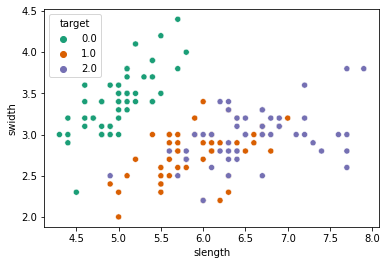

In [12]:
sns.scatterplot(data = df, x='slength', y='swidth', hue='target', palette= 'Dark2')

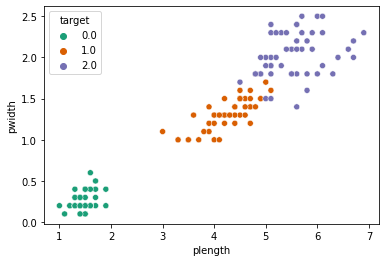

In [13]:
sns.scatterplot(data=df, x='plength', y='pwidth', hue='target', palette='Dark2')

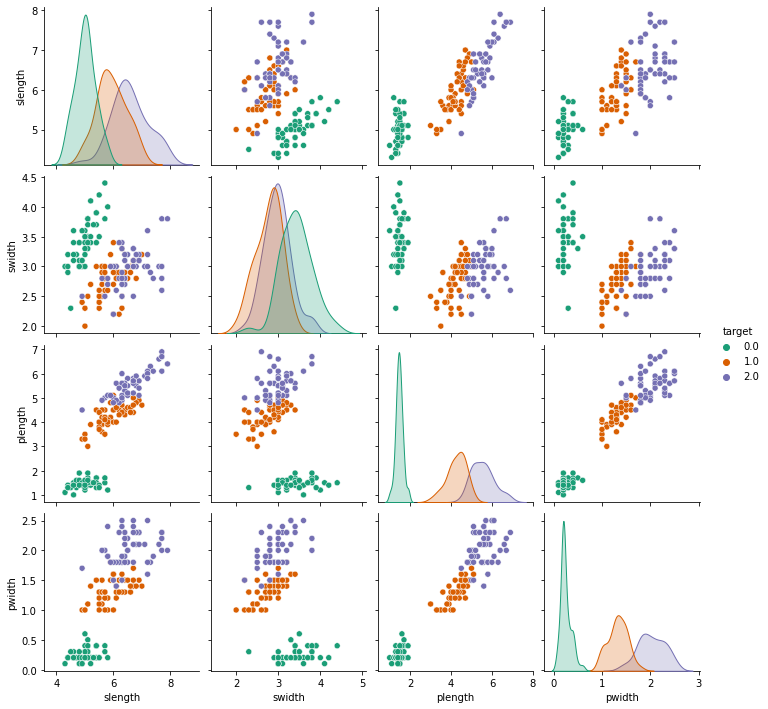

In [14]:
sns.pairplot(data=df, hue='target', palette='Dark2')

# Step5: Determine the Features & Target Variable

In [15]:
X=df.drop('target', axis=1)
y=df['target']

# Step6: Split the Dataset to Train & Test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# PART 01: Decision Trees

## Step7: Train the Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DTmodel= DecisionTreeClassifier()

In [20]:
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier()

## Step8: Predicting Test Data

In [21]:
DT_y_pred= DTmodel.predict(X_test)

## Step9: Evaluating the Model

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

### 🟣 Confusion Matrix

In [23]:
confusion_matrix(y_test, DT_y_pred)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]])

### Classification Report

In [24]:
print(classification_report(y_test, DT_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.95      0.95      0.95        20
         2.0       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Step10: Print Feature Importance

In [25]:
DT_fi = DTmodel.feature_importances_

In [26]:
pd.DataFrame(index=X.columns, columns=['feature importances'], data= DT_fi)

,feature importances
slength,0.00000
swidth,0.02154
plength,0.55951
pwidth,0.41895


## Step11: Visualize the Tree

In [27]:
from sklearn.tree import plot_tree

[Text(0.4, 0.9, 'plength <= 2.45\ngini = 0.663\nsamples = 105\nvalue = [37, 30, 38]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'pwidth <= 1.65\ngini = 0.493\nsamples = 68\nvalue = [0, 30, 38]'),
 Text(0.2, 0.5, 'plength <= 4.95\ngini = 0.121\nsamples = 31\nvalue = [0, 29, 2]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.3, 0.3, 'pwidth <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'plength <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'swidth <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

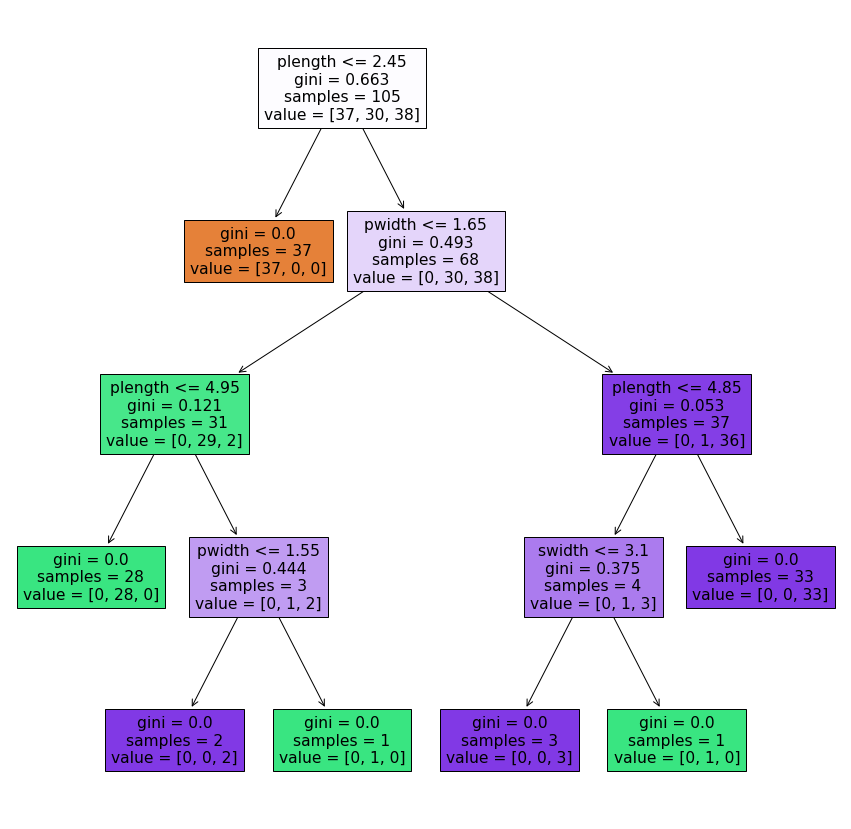

In [28]:
plt.figure(figsize=(15,15),)
plot_tree(DTmodel, filled=True, feature_names=X.columns)

## Step12: Understanding Hyperparameters

In [29]:
def report_model(model):
    model_preds= model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=X.columns);

### 🟣 Max Depth

### Classification Report

In [30]:
pruned_tree= DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### Plot Tree

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.90      0.95      0.93        20
         2.0       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45





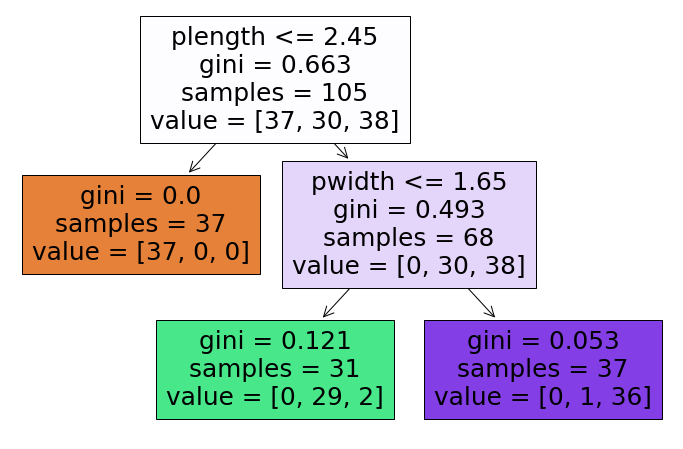

In [31]:
report_model(pruned_tree)

### 🟣 Max Leaf Nodes

### Classification Report

In [32]:
pruned_tree= DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

### Plot Tree

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.90      0.95      0.93        20
         2.0       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45





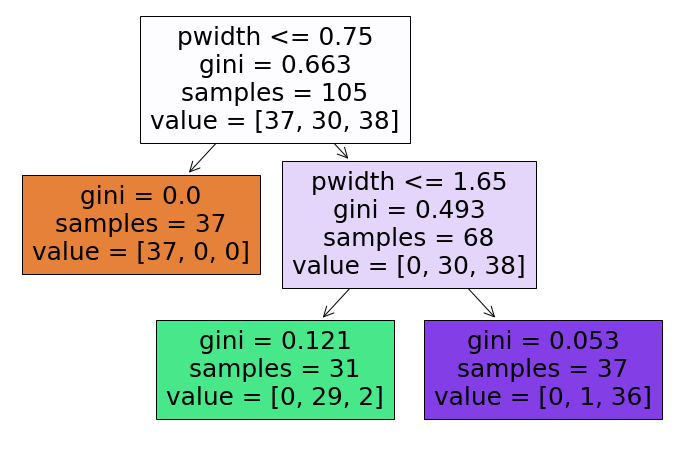

In [33]:
report_model(pruned_tree)

### 🟣 Criterion

### Classification Report

In [34]:
pruned_tree= DecisionTreeClassifier(criterion='entropy')
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Plot Tree

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.95      0.95      0.95        20
         2.0       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45





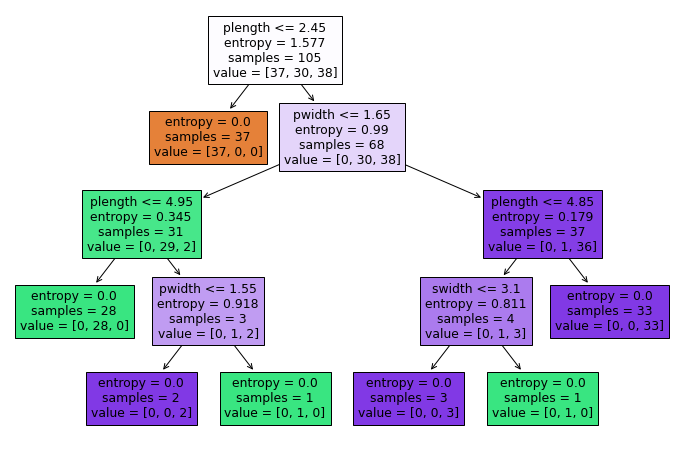

In [35]:
report_model(pruned_tree)

# PART 02: Random Forest

## Step13: Train the Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
RFmodel= RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [38]:
RFmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

## Step14: Predicting Test Data

In [39]:
RF_y_pred= RFmodel.predict(X_test)

## Step15: Evaluating the Model

## 🟣 Confusion Matrix

In [40]:
confusion_matrix(y_test, RF_y_pred)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  2, 10]])

### Classification Report

In [41]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.90      0.95      0.93        20
         2.0       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



## Step16: Print Feature Importance

In [44]:
RF_fi = RFmodel.feature_importances_
pd.DataFrame(RF_fi , df.columns.drop('target') , columns=['feature_importances'])

,feature_importances
slength,0.081310
swidth,0.049837
plength,0.228887
pwidth,0.639966


## Step17: Grid Search

## Grid Search

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [46]:
RFmodel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [47]:
help(RandomForestClassifier) 
'''
n_estimators changed from 10 to 100
criterion : {"gini", "entropy"}
max_features : {"auto", "sqrt", "log2"}
n_jobs :{ None , -1}
class_weight : {"balanced", "balanced_subsample"}

'''

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


'\nn_estimators changed from 10 to 100\ncriterion : {"gini", "entropy"}\nmax_features : {"auto", "sqrt", "log2"}\nn_jobs :{ None , -1}\nclass_weight : {"balanced", "balanced_subsample"}\n\n'

In [48]:


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# The function to measure the quality of a split
criterion = ['gini', 'entropy']
# Create the parameters grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' :criterion}
pprint(param_grid)

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10]}


In [49]:
CV_rfc = GridSearchCV(estimator=RFmodel, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10,
                                              random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10]})

In [50]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

## Predict

In [54]:
rfc = RandomForestClassifier(random_state=42, criterion = 'gini', max_depth=10, max_features='auto', min_samples_leaf= 1, min_samples_split = 5, n_estimators= 10, oob_score=True)

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=10,
                       oob_score=True, random_state=42)

In [56]:
pred = rfc.predict(X_test)

## Classification Report

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.90      0.95      0.93        20
         2.0       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



## OOB Error

In [58]:
print('Score: ', rfc.score(X_test, y_test))

Score:  0.9333333333333333


## OOB.oob_score

In [59]:
print(rfc.oob_score_)

0.9333333333333333


# PART 03: K-Means Clustering

## Step18: Creating and Fitting a KMeans Model

In [60]:
from sklearn.preprocessing import StandardScaler

In [112]:
x = df.iloc[: , [0,1,2,3]].values

In [113]:
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)

In [114]:
from sklearn.cluster import KMeans

In [115]:
KMmodel = KMeans()

In [116]:
cluster_labels= KMmodel.fit_predict(scaled_x)

In [117]:
cluster_labels

array([0, 7, 7, 7, 0, 4, 0, 0, 7, 7, 4, 0, 7, 7, 4, 4, 4, 0, 4, 4, 0, 4,
       0, 0, 0, 7, 0, 0, 0, 7, 7, 0, 4, 4, 7, 7, 0, 0, 7, 0, 0, 7, 7, 0,
       4, 7, 4, 7, 4, 0, 1, 3, 1, 2, 1, 3, 3, 2, 1, 2, 2, 3, 2, 3, 3, 1,
       3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 1, 1, 3, 2, 2, 2, 3, 1, 3, 3, 1, 2,
       3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 5, 1, 6, 1, 5, 6, 2, 6, 1, 5,
       5, 1, 5, 1, 1, 5, 1, 6, 6, 2, 5, 1, 6, 1, 5, 6, 1, 1, 1, 6, 6, 6,
       1, 1, 1, 6, 5, 1, 1, 5, 5, 5, 1, 5, 5, 5, 1, 1, 5, 1], dtype=int32)

In [118]:
len(scaled_x)

150

In [119]:
len(cluster_labels)

150

In [124]:
X['Cluster']=cluster_labels

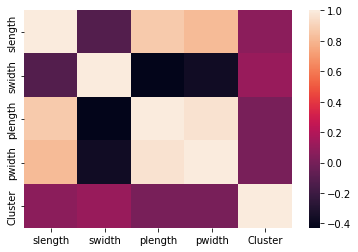

In [125]:
sns.heatmap(X.corr())

In [127]:
X.corr()['Cluster'].sort_values()

plength    0.007120
pwidth     0.010828
slength    0.069443
swidth     0.118038
Cluster    1.000000
Name: Cluster, dtype: float64

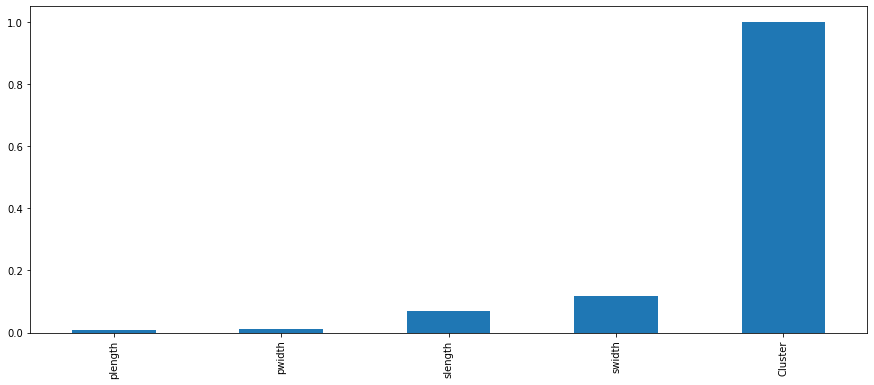

In [128]:
plt.figure(figsize=(15,6))
X.corr()['Cluster'].sort_values().plot(kind='bar')

## Step19: Choosing K Value

In [130]:
ssd= []

for k in range (1, 11):
    model=KMeans(n_clusters=k)
    
    model.fit(scaled_x)
    
    ssd.append(model.inertia_)

In [131]:
ssd

[600.0000000000001,
 222.36170496502302,
 139.82049635974982,
 114.09254690403091,
 90.80728315078542,
 81.46736496312099,
 70.68226933956178,
 62.339399905637904,
 55.56307760605414,
 49.97532402849623]

## 🟣 Plot--> K Value, Sum of Squared Distances

Text(0, 0.5, 'Sum of Squared Distances')

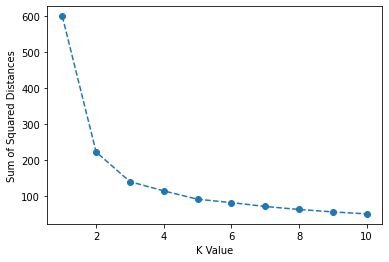

In [132]:
plt.plot(range(1,11), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')

## What's your choice?
<hr>

Answer: 3

In [133]:
KMmodel = KMeans( n_clusters= 3 )

In [136]:
cluster_labels= KMmodel.fit_predict(scaled_x)

In [137]:
pprint(cluster_labels)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)


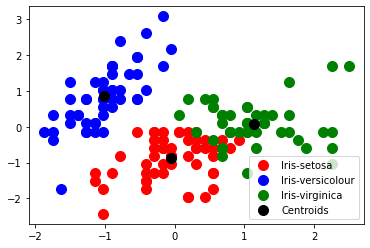

In [139]:
plt.scatter(scaled_x[cluster_labels  == 0, 0], scaled_x[cluster_labels == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_x[cluster_labels   == 1, 0], scaled_x[cluster_labels == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_x[cluster_labels   == 2, 0], scaled_x[cluster_labels == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(KMmodel.cluster_centers_[:,   0], KMmodel.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

In [140]:
X['Cluster']=cluster_labels

In [141]:
X.corr()['Cluster'].sort_values()

plength    0.232075
pwidth     0.268973
swidth     0.416708
slength    0.458215
Cluster    1.000000
Name: Cluster, dtype: float64

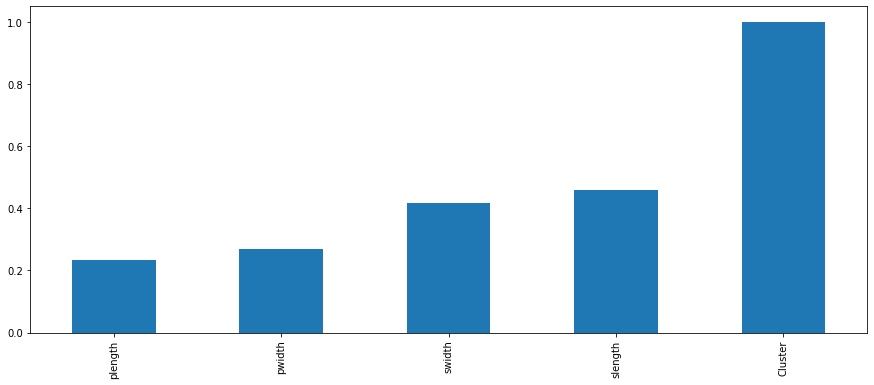

In [142]:
plt.figure(figsize=(15,6))
X.corr()['Cluster'].sort_values().plot(kind='bar')

# PART 04: Principal Component Analysis(PCA)

## Step20: Build the model

In [144]:
from sklearn.decomposition import PCA

In [161]:
PCmodel = PCA ()

In [162]:
principal_component = PCmodel.fit_transform(scaled_x)

In [179]:
principal_component.shape

(150, 4)

## Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


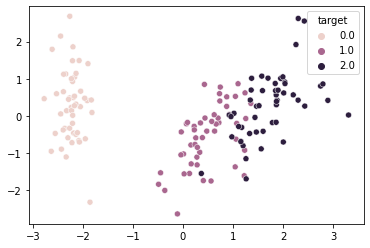

In [176]:
sns.scatterplot(principal_component[:,0] , principal_component[:,1],hue=df['target'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


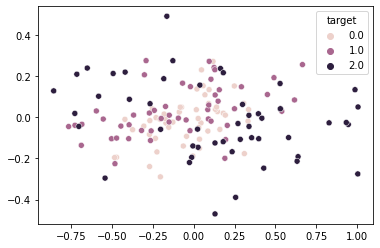

In [177]:
sns.scatterplot(principal_component[:,2] , principal_component[:,3],hue=df['target'])

In [171]:
PCmodel.explained_variance_ratio_

array([0.81711805, 0.13978153, 0.02438762, 0.01431832, 0.00439448])

In [172]:
np.sum(PCmodel.explained_variance_ratio_)

0.9999999999999999

## Step21: Model Components

In [173]:
X_new = PCmodel.fit_transform(X)

In [174]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

## We can visualize this relationship with a heatmap:

In [182]:
principal_component_df=pd.DataFrame(principal_component)


In [183]:
principal_component_df['target'] = df['target']

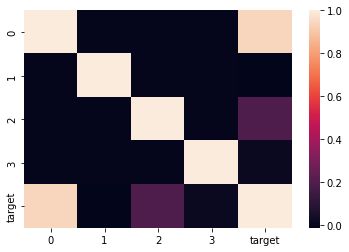

In [186]:
sns.heatmap(principal_component_df.corr())

## Step22: Calculating the Explained Variance by the Component

## Choosing n-components

In [168]:
explained_variance = []

for n in range(1,5):
  pca = PCA(n_components= n)
  pca.fit(scaled_x)

  explained_variance.append(np.sum(pca.explained_variance_ratio_))


### 🟣 Plot--> Number of Components, Variance Explained

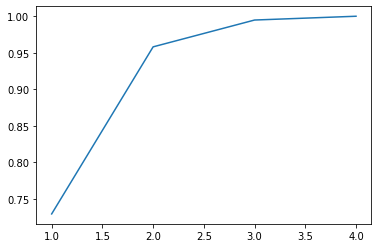

In [169]:
plt.plot(range(1,5) , explained_variance)